In [1]:
! ls data/
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

BX-Police.csv     Sales.csv         budget-sample.csv
Iris.csv          Stocks.csv


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [2]:
df = pd.read_csv('data/budget-sample.csv')
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,826,DEPT OF ENVIRONMENT PROTECTION,BROWN,TRACYANN,NaN,02/23/2004,QUEENS,COMMUNITY ASSISTANT,ACTIVE,37816.0,per Annum,2080.0,37235.48,11.00,206.04,1309.56
1,2020,56,POLICE DEPARTMENT,WONG,CHIWAI,NaN,07/08/2015,BROOKLYN,POLICE OFFICER,ACTIVE,63125.0,per Annum,2080.0,60758.85,343.13,10842.71,10325.31
2,2020,742,DEPT OF ED PEDAGOGICAL,FARRELL,TARA,E,09/09/1996,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,121226.0,per Annum,0.0,118638.72,0.00,0.00,13069.69
3,2020,827,DEPARTMENT OF SANITATION,ATTANASIO,JOSEPH,NaN,10/18/1999,QUEENS,SANITATION WORKER,ACTIVE,77318.0,per Annum,2080.0,75833.83,455.50,28225.89,17602.11
4,2020,744,DEPT OF ED PARA PROFESSIONALS,MCNEIL,GLORIA,D,09/28/1989,MANHATTAN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.00,0.00,5076.22


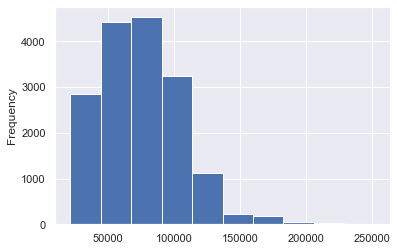

In [3]:
df['base_salary'].plot(kind = 'hist')
#from this histogram we can tell that base salaries in the range of 50,000 and 100,000 are more frequent

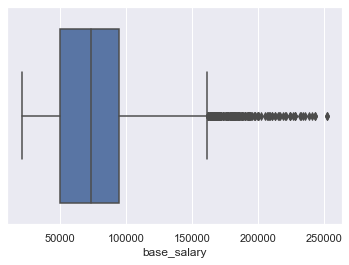

In [4]:
sns.boxplot(data = df, x = 'base_salary')
#from this boxplot is is shown that salaries above 150,000 are outliers

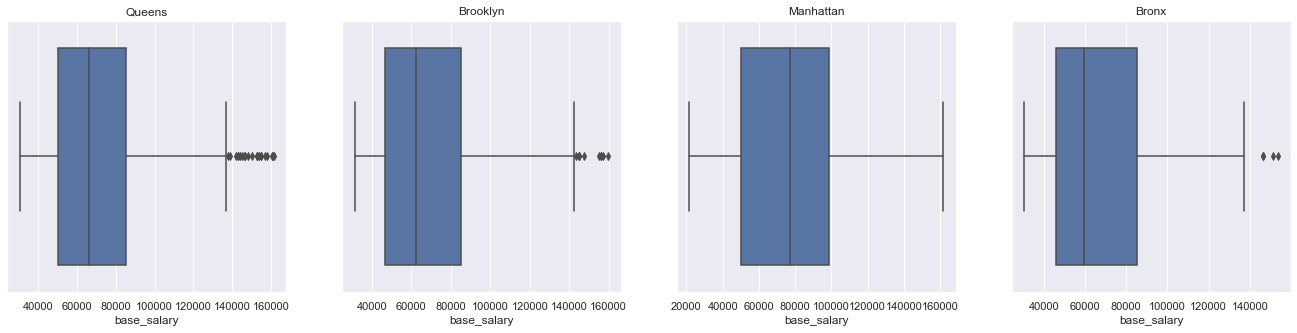

In [5]:
#Remove outliers
# Calculate Q1
Q1 = df['base_salary'].quantile(0.25)
Q1

# # # Calculate Q3
Q3 = df['base_salary'].quantile(0.75)
Q3
# # # Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1
IQR
# # # Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['base_salary'] < (Q1 - 1.5 * IQR)

# # # Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['base_salary'] > (Q3 + 1.5 * IQR)

# # # Select the INVERSE of the selection
df = df[ ~(outliers_above | outliers_below) ]

#plot for each borough
f, axes = plt.subplots(1, 4, figsize = (23,5))
condition = df.work_location_borough == 'QUEENS'
ax = sns.boxplot(data = df[condition] , x = 'base_salary', ax = axes[0]).set_title('Queens')
condition = df.work_location_borough == 'BROOKLYN'
ax = sns.boxplot(data = df[condition] , x = 'base_salary', ax = axes[1]).set_title('Brooklyn')
condition = df.work_location_borough == 'MANHATTAN'
ax = sns.boxplot(data = df[condition] , x = 'base_salary', ax = axes[2]).set_title('Manhattan')
condition = df.work_location_borough == 'BRONX'
ax = sns.boxplot(data = df[condition] , x = 'base_salary', ax = axes[3]).set_title('Bronx')
# these plots show that the Bronx has the lowest salaries on average while manhattan has the highest

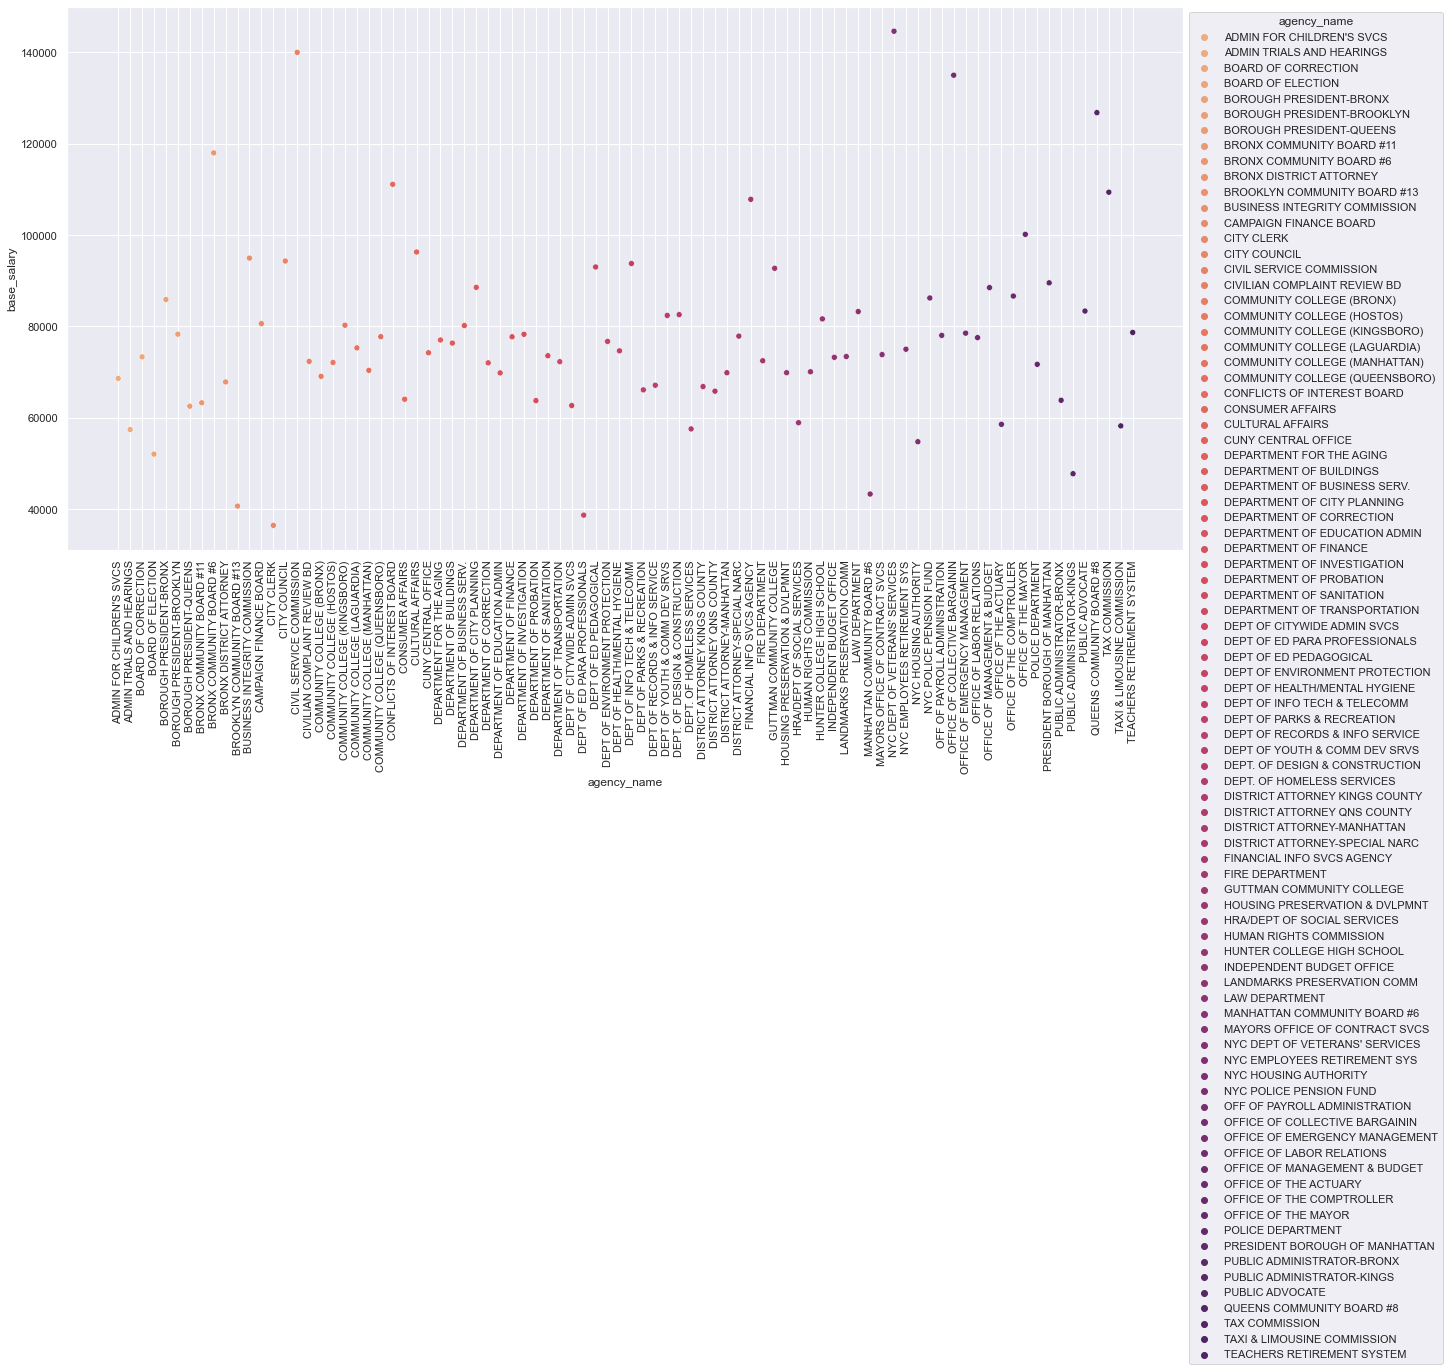

In [6]:
gb = df.groupby('agency_name')['base_salary'].mean()
new_df = pd.DataFrame(gb)
new_df = new_df.reset_index()

sns.set(rc={'figure.figsize':(20,10)})
a = sns.scatterplot(data= new_df, x='agency_name', y='base_salary', hue = 'agency_name', palette='flare');
sns.move_legend(a, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
a
#I would want to work for the NYC Department of Veterans' Services based on this information

# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [7]:
df = pd.read_csv('data/BX-Police.csv')
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


In [8]:
gb = df.groupby('fiscal_year')['base_salary'].mean()
new_df = pd.DataFrame(gb)
new_df = new_df.reset_index()

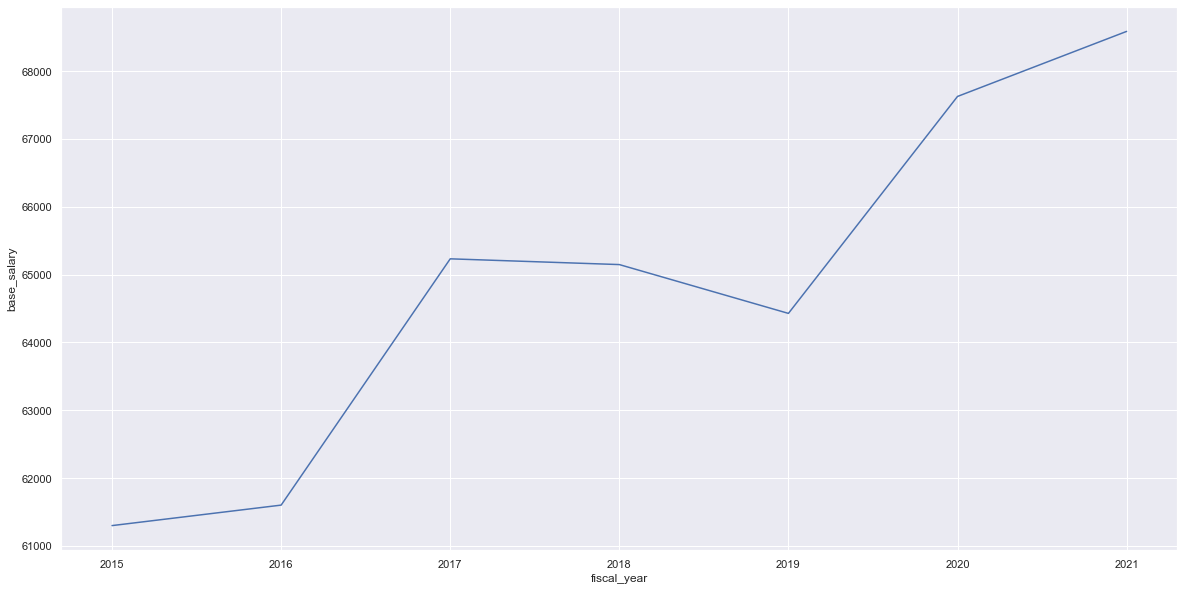

In [9]:
sns.lineplot(data=new_df, x="fiscal_year", y="base_salary")

In [10]:
#This trend shows that the average base salaries are in an uptrend
#I think this trend exists because of inflation

# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [11]:
df = pd.read_csv('data/Stocks.csv')
df.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG


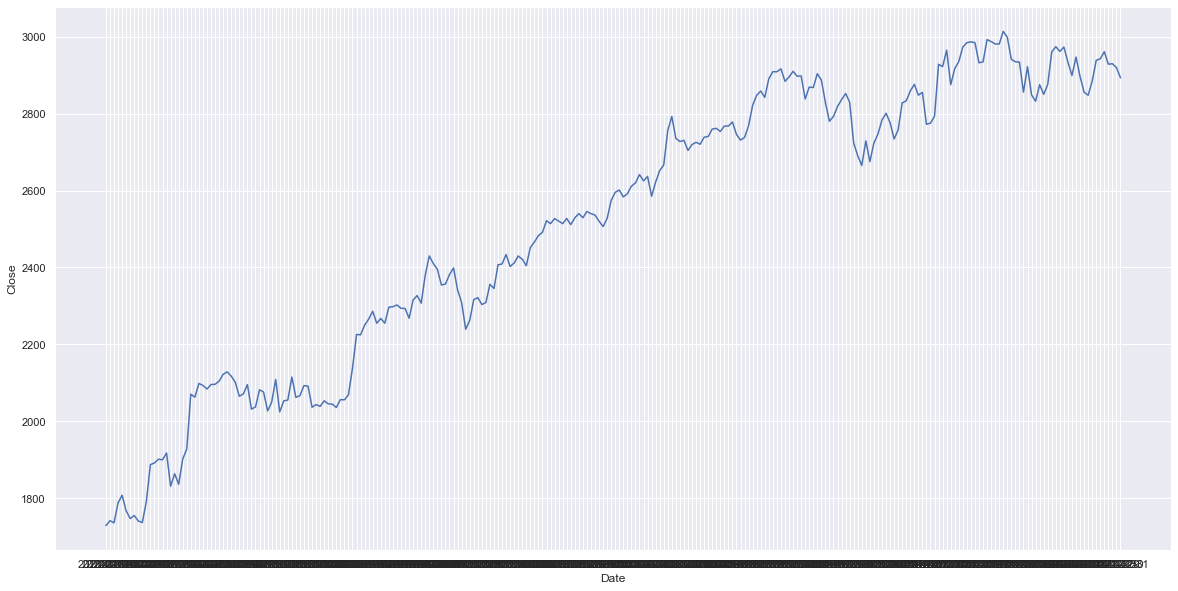

In [12]:
goog = sns.lineplot(data=df, x="Date", y="Close")
goog

In [13]:
# The above chart shows google closing prices for everyday of the year,
#it shows how much google grew throughout the year

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [14]:
df = pd.read_csv('data/Sales.csv')
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740


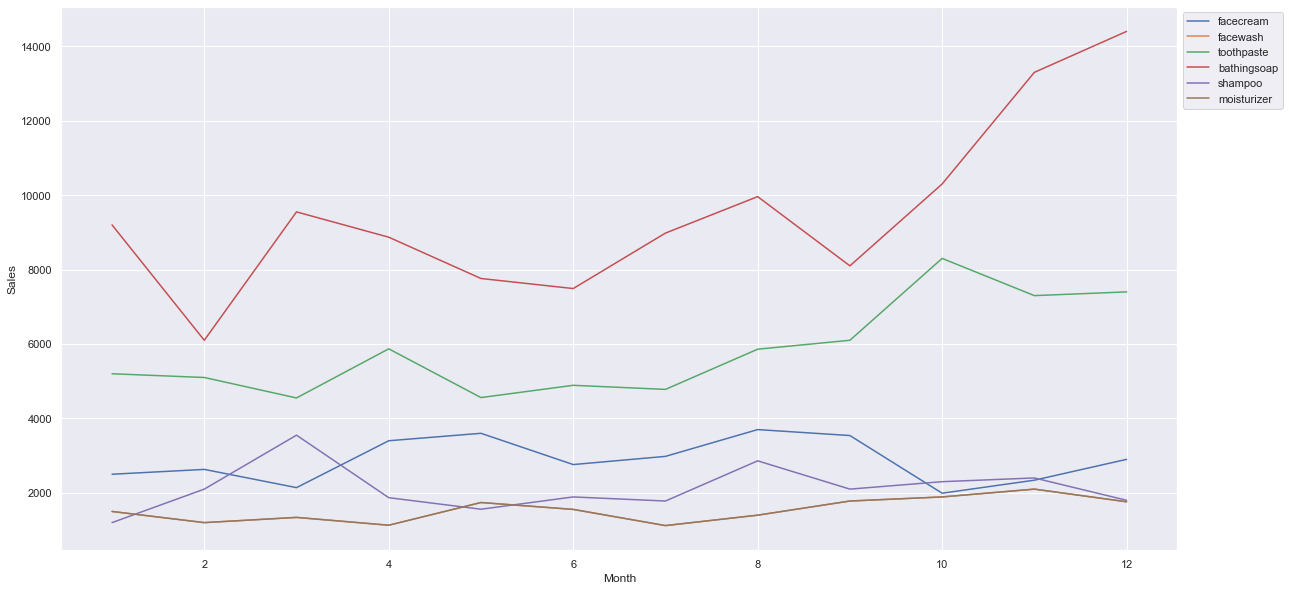

In [15]:
sales = sns.lineplot(data=df, x="month_number", y="facecream")
sales = sns.lineplot(data=df, x="month_number", y="facewash")
sales = sns.lineplot(data=df, x="month_number", y="toothpaste")
sales = sns.lineplot(data=df, x="month_number", y="bathingsoap")
sales = sns.lineplot(data=df, x="month_number", y="shampoo")
sales = sns.lineplot(data=df, x="month_number", y="moisturizer")
plt.ylabel("Sales")
plt.xlabel("Month")
sales.legend(['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer'])
sns.move_legend(sales, "upper left", bbox_to_anchor=(1, 1))
sales

In [16]:
#From this chart they should push more bathingsoap, and they should stop selling moisturizer

In [17]:
columns = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']

df[columns].sum() / df[columns].sum().sum() * 100


facecream      12.277453
facewash        6.592722
toothpaste     24.893178
bathingsoap    40.596069
shampoo         9.047856
moisturizer     6.592722
dtype: float64